# Text Generation using Long-Short Term Memory (LSTM) Model

## 1. Prepare & Explore Dataset

In [2]:
from tensorflow import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

In [3]:
#read the corpus dataset
path = get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

606208/600901 [==============================] - 1s 1us/step
corpus length: 600893


In [4]:
#prepare charachter-based model
chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 57


In [5]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

nb sequences: 200285
Vectorization...


## 2. Define the neural network architecture

In [6]:
# build the model: using single LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

## 3. Compile the neural net

In [7]:
optimizer = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

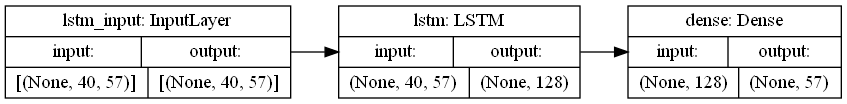

In [8]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## 4. Fit / train the neural net

In [9]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [10]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

In [11]:
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=12,
          callbacks=[print_callback])

Epoch 1/12
1565/1565 [==============================] - 63s 38ms/step - loss: 2.7279

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "he dog-like kind of men who let themselv"
he dog-like kind of men who let themselver and and and and and and and and and and and songe the some the sore song and and the sore and and the mand and and and and in the preand and and and of the seres and and and of and and and and and and and and and the mand whe nome the songere fore the seres and the seres and the sore the senger and and and and and and as and and and of the songen the seres and and and in the gore the sesting th
----- diversity: 0.5
----- Generating with seed: "he dog-like kind of men who let themselv"
he dog-like kind of men who let themselver in mane se and andende the sast in and ansingens and and of congers in the ingerstane so cerinase and and loperand to wive the wing the mont als gore the mend the serene couslevers and and the and ant and ande

orghar cordition and intoppinible of the pare--is allorapendin: growgred."


7;r fill, remangeded is nit, of sory wilh meally to the sheed colfored aritive there the
concrejution; thisege of in-relaredy for mon
or amake(and distut. wo may, "s voll the
chelded hiskinctoride enderolapuentarion of theires subolingition of the
ad
----- diversity: 1.2
----- Generating with seed: "ellow soul that is constantly
breaking d"
ellow soul that is constantly
breaking deugtse," to ache and the evally exsentit bemong meitlos of ouniwion in
mand to is ratain tayns., there. o they know o salina; thourkink(
11.pofally to no termand, revidude, thum shjuck assse invacious enve! atuster, alll, crarative wich conaidet
freats cadeatere--and
perwandicis eritases. i neev puthincy man,
as urcally--lost" to
is a bitkiffe. elver
nesition. the enwerd trakethe."
 i , an ! a yor
Epoch 5/12
1565/1565 [==============================] - 58s 37ms/step - loss: 1.7748

----- Generating text after Epoch: 4
----- diversity:

sense of the prostical the same the sense of the sense of the prostical the sense of the suble of the sense of the fact of the sense of the prosons of the person of the sense of the person of the sense of the person and the prostical the same of the perhopracing of the sense of the sense of the prostical the strong and the sense of the perhaps and the same the sense of the prosons of the sense of 
----- diversity: 0.5
----- Generating with seed: ""). this is the essentially fundamental
"
"). this is the essentially fundamental
so the aptist for the last fact that the seetine, stand
mest subfly of the prodection of the desting than the restoracion of a lifier, and something and the heartor of all there is such a strong and the sense of a parting to man in the sension and the personalis such a some man in the profounting man arought to the some of the proction,
same with a things of the power that the manity as the prosti
----- diversity: 1.0
----- Generating with seed: ""). this is the 

iffelief--byen are to powersuin his arganst and eduth forgutes, and the philosopher feeli
----- diversity: 1.2
----- Generating with seed: "rt (there is much of the odour of the
ge"
rt (there is much of the odour of the
gendenal gor; so anone-rapentic what a shrete layk oo nozeekn, are
atceptible mpademable, thing henct
from beous stallice vaumef, when precifesems of dadingable deval,p cinclive men and arrisif what, everytione
te an
farce that which
the midsoranity-oforuth.

 f   howe recalled, a chraso, is tewt
il as beches fealded this typelves
that repided it pade-ininishing. seceatery bimfable pudtataye despica
Epoch 12/12
1565/1565 [==============================] - 57s 36ms/step - loss: 1.4701

----- Generating text after Epoch: 11
----- diversity: 0.2
----- Generating with seed: "me to time, that is, his illogical funda"
me to time, that is, his illogical fundamental such a strong and every possible the spirit and self-dergrance of the stand of the postious self-destractive the 